# Grup L - Analisis Multivariat

## Analisis Komponen Utama
## Principle Component Analysis (PCA)

In [ ]:
packages <- c("Hmisc", "matlib", "Matrix","expm","matrixcalc","ellipsis","Hotelling","dplyr")
if ( length(missing_pkgs <- setdiff(packages, rownames(installed.packages()))) > 0) {
  message("Installing missing package(s): ", paste(missing_pkgs, collapse = ", "))
  install.packages(missing_pkgs)
}
lapply(packages, library, character.only = TRUE)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘expm’


The following object is masked from ‘package:Matrix’:

    expm



Attaching package: ‘matrixcalc’


The following object is masked from ‘package:matlib’:

    vec


Loading required package: corpcor


Attaching package: ‘corpcor’


The following object is masked from ‘package:matrixcalc’:

    is.positive.definite


The following object is masked from ‘package:matlib’:

    mpower



Attaching package: ‘dplyr’


The following object is masked from ‘package:Hotelling’:

    summarise


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff,

[[1]]
 [1] "Hmisc"     "ggplot2"   "Formula"   "survival"  "lattice"   "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "matlib"    "Hmisc"     "ggplot2"   "Formula"   "survival"  "lattice"  
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[3]]
 [1] "Matrix"    "matlib"    "Hmisc"     "ggplot2"   "Formula"   "survival" 
 [7] "lattice"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[4]]
 [1] "expm"      "Matrix"    "matlib"    "Hmisc"     "ggplot2"   "Formula"  
 [7] "survival"  "lattice"   "stats"     "graphics"  "grDevices" "utils"    
[13] "datasets"  "methods"   "base"     

[[5]]
 [1] "matrixcalc" "expm"       "Matrix"     "matlib"     "Hmisc"     
 [6] "ggplot2"    "Formula"    "survival"   "lattice"    "stats"     
[11] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[16] "base"      

[[6]]
 [1] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
 [6] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[11] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[16] "methods"    "base"      

[[7]]
 [1] "Hotelling"  "corpcor"    "ellipsis"   "matrixcalc" "expm"      
 [6] "Matrix"     "matlib"     "Hmisc"      "ggplot2"    "Formula"   
[11] "survival"   "lattice"    "stats"      "graphics"   "grDevices" 
[16] "utils"      "datasets"   "methods"    "base"      

[[8]]
 [1] "dplyr"      "Hotelling"  "corpcor"    "ellipsis"   "matrixcalc"
 [6] "expm"       "Matrix"     "matlib"     "Hmisc"      "ggplot2"   
[11] "Formula"    "survival"   "lattice"    "stats"      "graphics"  
[16] "grDevices"  "utils"      "datasets"   "methods"    "base"

### Import File

#### Variabel 1 = Temperature in Celcius Degree
#### Variabel 2 = Relative Humidity in %
#### Variabel 3 = Wind Speed in km/h
#### Variabel 4 = Area - Burned Area of the Forest in ha

In [ ]:
# import file
data <- read.table("forestfiresfinal.csv", header=TRUE, sep=";")
datanew <- as.matrix(data)
datanew

temp,RH,wind,area
18.0,42,2.7,0.36
21.7,38,2.2,0.43
21.9,39,1.8,0.47
23.3,31,4.5,0.55
21.2,51,8.9,0.61
16.6,53,5.4,0.71
23.8,32,5.4,0.77
27.4,22,4.0,0.90
13.2,40,5.4,0.95
24.2,28,3.6,0.96


### Vektor Mean, Matriks Kovariansi, Matriks Korelasi

In [ ]:
#Vektor Mean
matrix(colMeans(datanew), ncol=1)

20.336667
39.700000
3.950000
1.347333


In [ ]:
#Matriks Kovariansi
covdata <- cov(datanew)
cov(datanew)

,temp,RH,wind,area
temp,24.4513678,-39.616207,-1.7381034,-0.8004161
RH,-39.6162069,137.320690,-1.1500000,1.6391724
wind,-1.7381034,-1.150000,3.9053448,-0.1821724
area,-0.8004161,1.639172,-0.1821724,0.3477857


In [ ]:
#Matriks Korelasi
cordata <- cor(datanew)
cordata

,temp,RH,wind,area
temp,1.0000000,-0.68368071,-0.17786658,-0.2744785
RH,-0.6836807,1.00000000,-0.04965925,0.2371924
wind,-0.1778666,-0.04965925,1.00000000,-0.1563137
area,-0.2744785,0.23719239,-0.15631370,1.0000000


### Nilai Eigen dan Vektor Eigen dari Matriks Kovariansi

In [ ]:
#Nilai Eigen dari Matriks Kovariansi
eig_val_cov <- eigen(covdata)$values
eig_val_cov

[1] 149.8616051  12.4107519   3.4481580   0.3046731

In [ ]:
#Vektor Eigen dari Matriks Kovariansi
eig_vec_cov <- eigen(covdata)$vectors * (-1)
eig_vec_cov

-0.301217177,-0.92827974,0.21497894,-0.0367286072
0.953471020,-0.29254577,0.07286593,0.0007378772
-0.003940523,0.22885730,0.97107848,-0.0679367231
0.012070592,0.01838566,-0.07403514,-0.9970130724


In [ ]:
#Memastikan vektor eigen dan nilai eigennya benar
print(round(eig_vec_cov %*% diag(eig_val_cov) %*% solve(eig_vec_cov)) == round(covdata))
round(eig_vec_cov %*% diag(eig_val_cov) %*% solve(eig_vec_cov))

     temp   RH wind area
temp TRUE TRUE TRUE TRUE
RH   TRUE TRUE TRUE TRUE
wind TRUE TRUE TRUE TRUE
area TRUE TRUE TRUE TRUE


24,-40,-2,-1
-40,137,-1,2
-2,-1,4,0
-1,2,0,0


### Nilai Eigen dan Vektor Eigen dari Matriks Korelasi

In [ ]:
#Nilai Eigen dari Matriks Korelasi
eig_val_cor <- eigen(cordata)$values
eig_val_cor

[1] 1.8403025 1.1357060 0.7510442 0.2729473

In [ ]:
#Vektor Eigen dari Matriks Korelasi
eig_vec_cor <- eigen(cordata)$vectors * (-1)
eig_vec_cor

-0.65734203,-0.23091565,-0.08911436,-0.7117851
0.64353988,0.01744482,0.40308512,-0.6504418
0.02835677,0.84714401,-0.47226295,-0.2418897
0.39109305,-0.47824750,-0.77881238,-0.1085211


### Reduksi Dimensi / Variabel

#### Metode 1 :
#### Menghitung proporsi variansi dan kumulatifnya - Matriks Kovariansi

In [ ]:
data.pr<-prcomp(data, scale. = FALSE)
summary(data.pr)

Importance of components:
                           PC1     PC2     PC3     PC4
Standard deviation     12.2418 3.52289 1.85692 0.55197
Proportion of Variance  0.9026 0.07475 0.02077 0.00184
Cumulative Proportion   0.9026 0.97740 0.99816 1.00000

In [ ]:
pvcov <- eig_val_cov/sum(eig_val_cov)
pvcov
kumvcov <- cumsum(pvcov)
kumvcov

[1] 0.902643790 0.074752223 0.020768885 0.001835102

[1] 0.9026438 0.9773960 0.9981649 1.0000000

Satu komponen utama pertama menjelaskan 90.26% dari total variansi

#### Menghitung proporsi variansi dan kumulatifnya - Matriks Korelasi

In [ ]:
data.pr<-prcomp(data, scale. = TRUE)
summary(data.pr)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.3566 1.0657 0.8666 0.52244
Proportion of Variance 0.4601 0.2839 0.1878 0.06824
Cumulative Proportion  0.4601 0.7440 0.9318 1.00000

In [ ]:
pvcor <- eig_val_cor/sum(eig_val_cor)
pvcor
kumvcor <- cumsum(pvcor)
kumvcor

[1] 0.46007563 0.28392650 0.18776105 0.06823683

[1] 0.4600756 0.7440021 0.9317632 1.0000000

Tiga komponen utama pertama menjelaskan 93.17% dari total variansi

In [ ]:
#pca versi cov
pcajadi_cov <- scale(datanew) %*% (eig_vec_cov * (-1))
head(pcajadi_cov)

-0.3117635,-0.2056971,0.5775714,-1.729674
0.2366557,0.4447562,0.6960664,-1.600786
0.1658571,0.5523421,0.8827300,-1.545489
0.9058081,0.3002697,-0.4450957,-1.306518
-0.8418761,-0.1060858,-2.6327341,-1.070678
-1.2938441,-0.5174946,-0.7127707,-1.056231


In [ ]:
#pca versi cor
pcajadi_cor <- scale(datanew) %*% (eig_vec_cor *(-1))
head(pcajadi_cor)

0.23577090,-0.37738250,-1.7238347,-0.5433766
0.90805204,0.07246024,-1.5466085,-0.2811231
0.85893490,0.28421921,-1.6201675,-0.2384280
1.39258448,-0.73103818,-0.5688715,-0.1357470
-0.08784757,-2.69638824,-0.1639389,1.2216981
-0.82527818,-1.33272220,-1.0199882,0.2605576


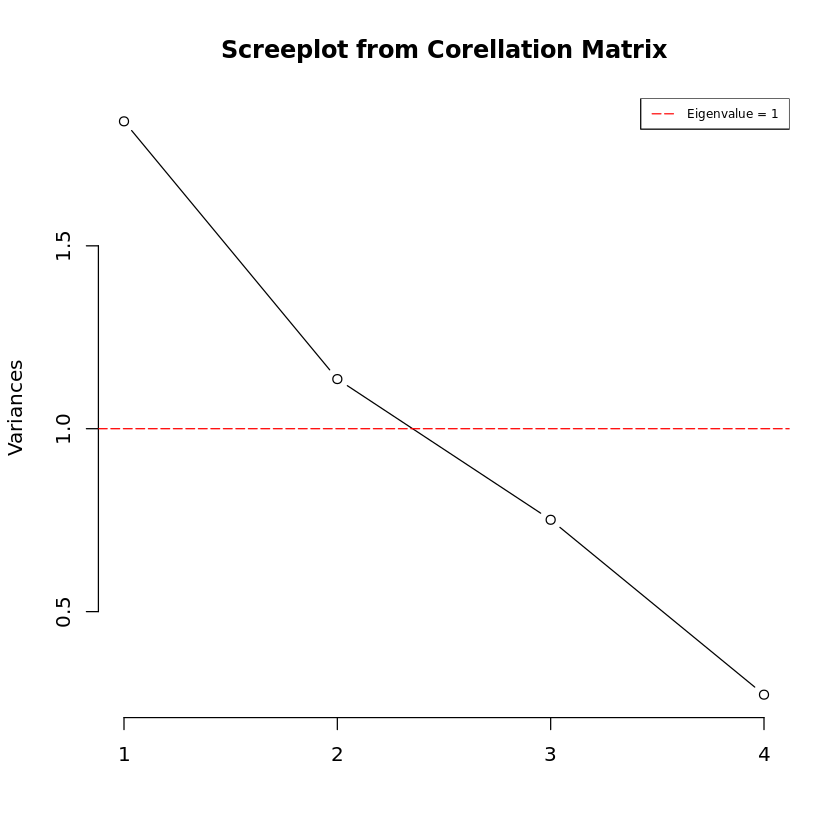

In [ ]:
data.pr<-prcomp(data, scale. = TRUE)
screeplot(data.pr, type = "l", npcs = 4, main = "Screeplot from Corellation Matrix")
abline(h = 1, col="red", lty=5)
legend("topright", legend=c("Eigenvalue = 1"),col=c("red"), lty=5, cex=0.6)

### PCA Menggunakan package R

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.3566 1.0657 0.8666 0.52244
Proportion of Variance 0.4601 0.2839 0.1878 0.06824
Cumulative Proportion  0.4601 0.7440 0.9318 1.00000

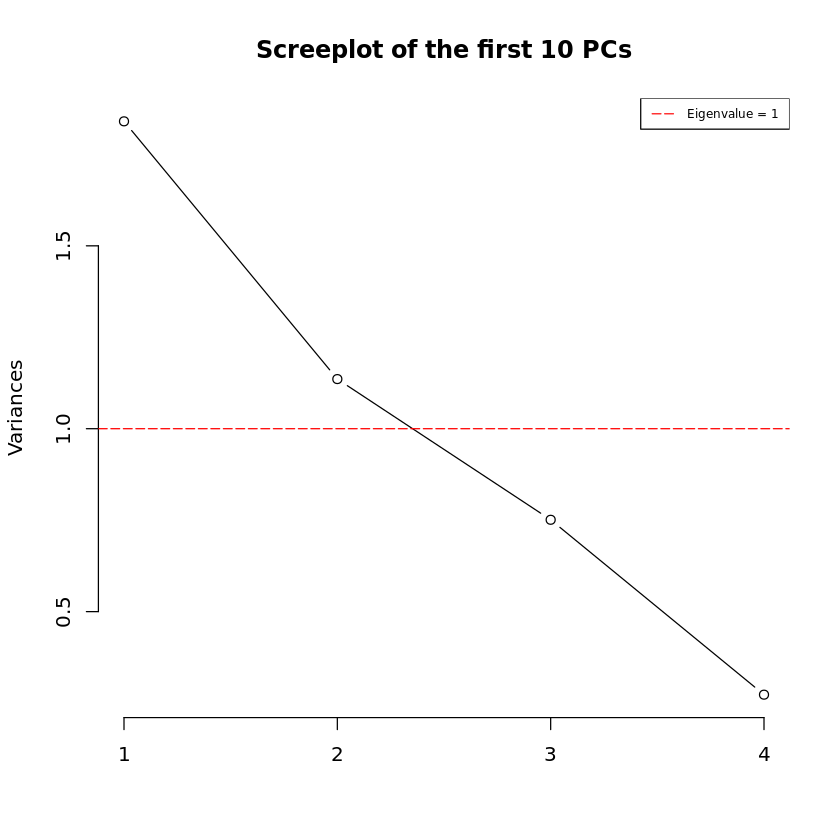

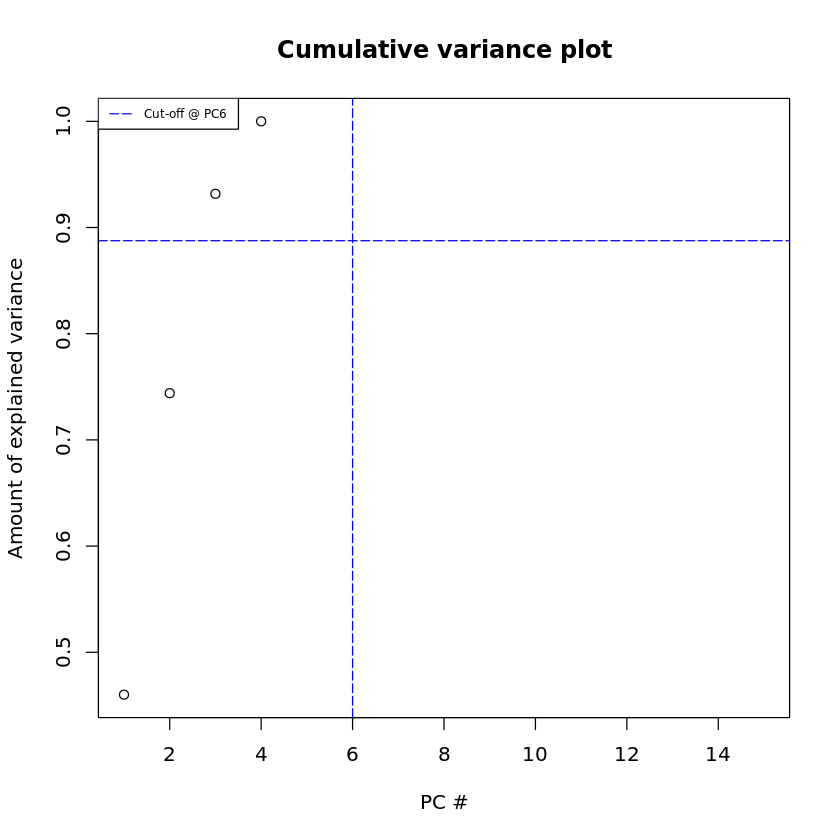

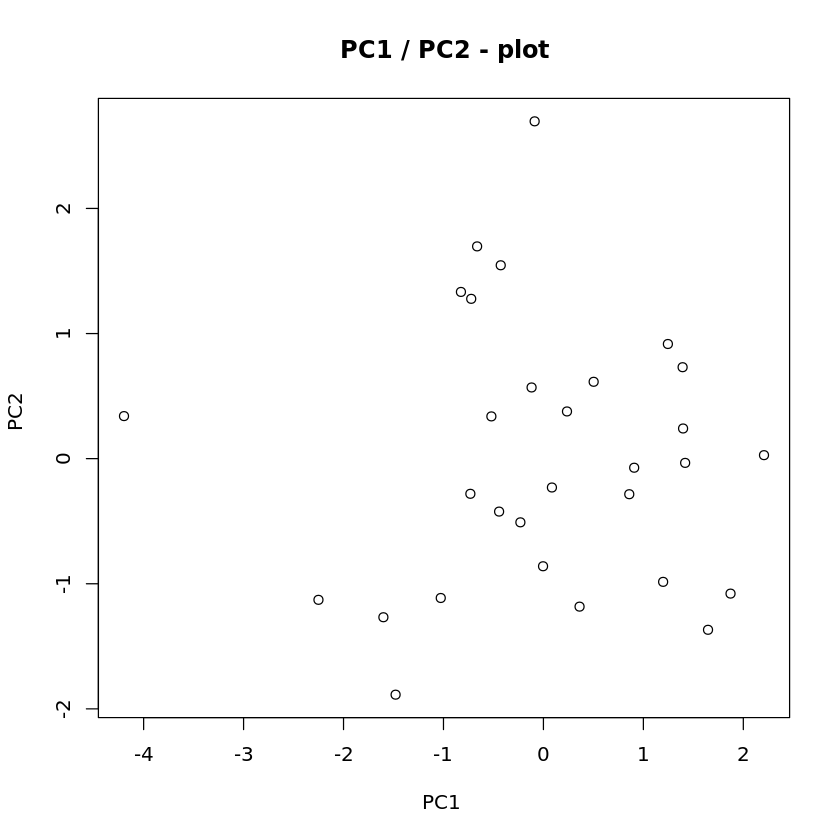

In [ ]:
data.pr<-prcomp(data, scale. = TRUE)
summary(data.pr)
  
screeplot(data.pr, type = "l", npcs = 4, main = "Screeplot of the first 10 PCs")
abline(h = 1, col="red", lty=5)
legend("topright", legend=c("Eigenvalue = 1"),
        col=c("red"), lty=5, cex=0.6)
  
cumpro <- cumsum(data.pr$sdev^2 / sum(data.pr$sdev^2))
plot(cumpro[0:15], xlab = "PC #", ylab = "Amount of explained variance", main = "Cumulative variance plot")
abline(v = 6, col="blue", lty=5)
abline(h = 0.88759, col="blue", lty=5)
legend("topleft", legend=c("Cut-off @ PC6"),
        col=c("blue"), lty=5, cex=0.6)
  
plot(data.pr$x[,1],data.pr$x[,2], xlab="PC1 ", ylab = "PC2 ", main = "PC1 / PC2 - plot")

In [ ]:
data.pr

Standard deviations (1, .., p=4):
[1] 1.3565775 1.0656951 0.8666281 0.5224436

Rotation (n x k) = (4 x 4):
             PC1         PC2         PC3       PC4
temp  0.65734203 -0.23091565  0.08911436 0.7117851
RH   -0.64353988  0.01744482 -0.40308512 0.6504418
wind -0.02835677  0.84714401  0.47226295 0.2418897
area -0.39109305 -0.47824750  0.77881238 0.1085211

In [ ]:
data.pr$x[,1:3]

PC1,PC2,PC3
0.235770896,0.37738250,-1.72383467
0.908052044,-0.07246024,-1.54660849
0.858934902,-0.28421921,-1.62016748
1.392584480,0.73103818,-0.56887147
-0.087847574,2.69638824,-0.16393890
-0.825278183,1.33272220,-1.01998815
1.245323528,0.91657449,-0.08864412
2.206937798,0.02800531,0.15732448
-0.722496131,1.27751473,-0.31714440
1.417992349,-0.03375493,-0.12308425


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9416f3b3-1e5d-414d-be63-3674a828c8b9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>